In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('data2.csv')
df

,Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,6.2,86,4,8.0,101.24,Drizzle
1,6.2,87,4,8.0,101.24,Drizzle
2,6.2,89,7,4.0,101.26,Drizzle
3,6.5,88,6,4.0,101.27,Drizzle
4,6.5,88,7,4.8,101.23,Drizzle
...,...,...,...,...,...,...
8285,8.1,81,30,9.7,100.13,Drizzle
8286,8.2,83,24,9.7,100.03,Drizzle
8287,7.5,93,28,4.8,99.95,Drizzle
8288,7.8,89,28,9.7,99.91,Drizzle


In [3]:
df.head()

,Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,6.2,86,4,8.0,101.24,Drizzle
1,6.2,87,4,8.0,101.24,Drizzle
2,6.2,89,7,4.0,101.26,Drizzle
3,6.5,88,6,4.0,101.27,Drizzle
4,6.5,88,7,4.8,101.23,Drizzle


In [4]:
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8290 entries, 0 to 8289
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Temp_C           8290 non-null   float64
 1   Rel Hum_%        8290 non-null   int64  
 2   Wind Speed_km/h  8290 non-null   int64  
 3   Visibility_km    8290 non-null   float64
 4   Press_kPa        8290 non-null   float64
 5   Weather          8290 non-null   object 
dtypes: float64(3), int64(2), object(1)
memory usage: 388.7+ KB
None


In [5]:
df.isnull().sum()

Temp_C             0
Rel Hum_%          0
Wind Speed_km/h    0
Visibility_km      0
Press_kPa          0
Weather            0
dtype: int64

In [6]:
df.shape

(8290, 6)

In [7]:
print("First Few Rows of the Dataset:")
df.head()

First Few Rows of the Dataset:


,Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,6.2,86,4,8.0,101.24,Drizzle
1,6.2,87,4,8.0,101.24,Drizzle
2,6.2,89,7,4.0,101.26,Drizzle
3,6.5,88,6,4.0,101.27,Drizzle
4,6.5,88,7,4.8,101.23,Drizzle


C:\Users\HP\AppData\Local\Temp\ipykernel_1612\149454437.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


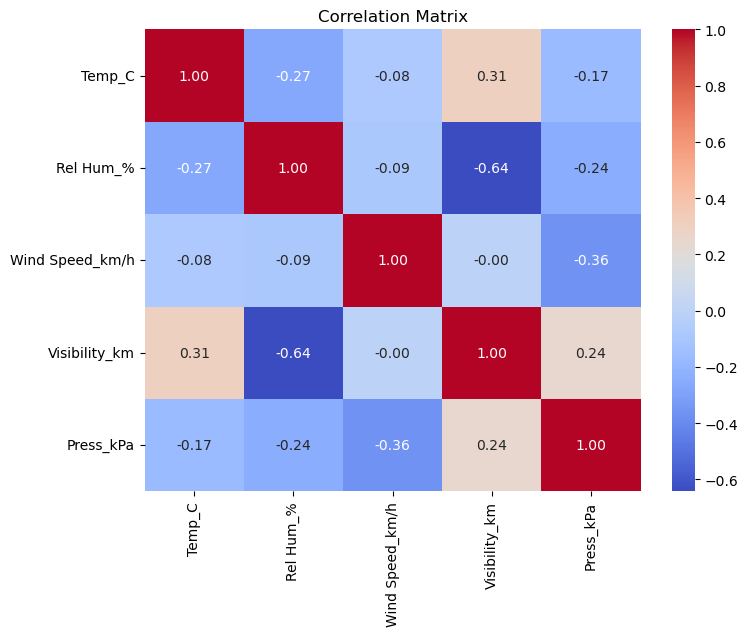

In [8]:
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [9]:
features = ['Temp_C', 'Rel Hum_%', 'Wind Speed_km/h', 'Visibility_km', 'Press_kPa']
target = "Weather"

x = df[features]
y = df[target]

In [10]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

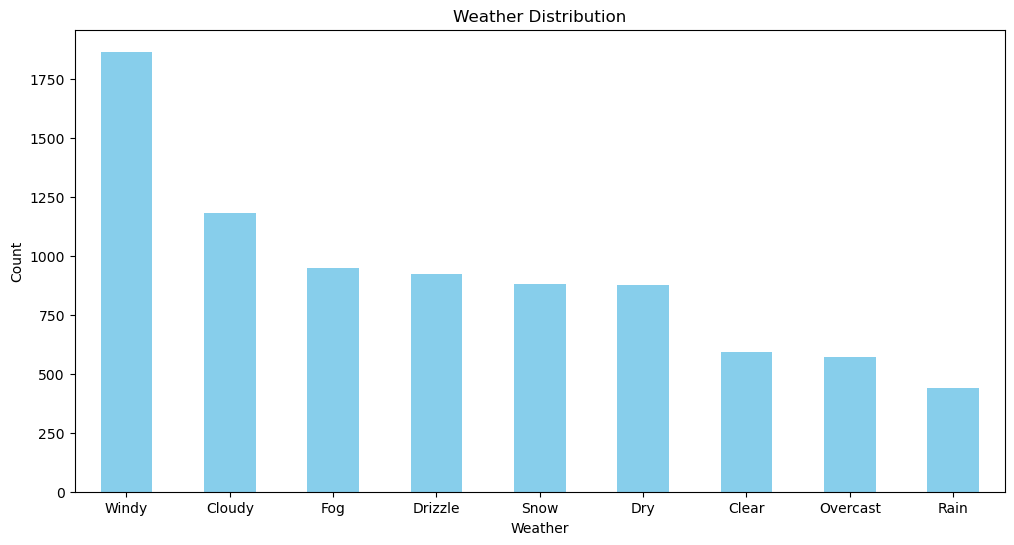

In [11]:
cluster_counts = df['Weather'].value_counts()

plt.figure(figsize=(12, 6))
cluster_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Weather')
plt.ylabel('Count')
plt.title('Weather Distribution')
plt.xticks(rotation=0)
plt.show()

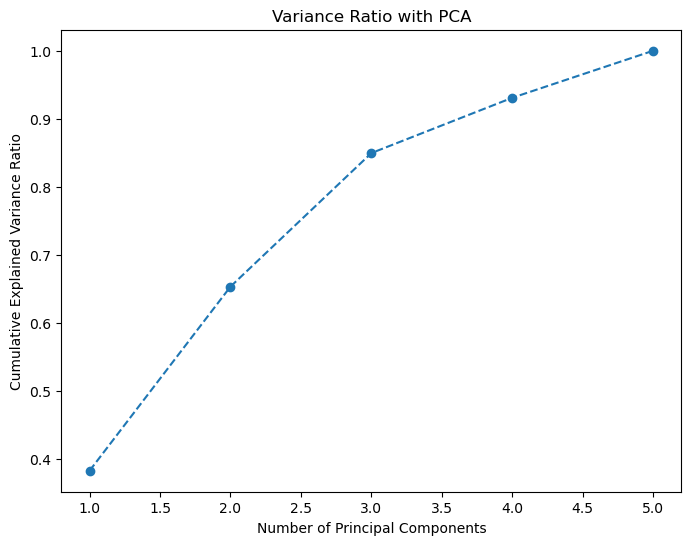

In [12]:
pca = PCA()
pca.fit(x_scaled)
explained_variance_ratio = pca.explained_variance_ratio_

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio.cumsum(), marker='o', linestyle='--')
plt.title("Variance Ratio with PCA")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance Ratio")
plt.show()

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3, random_state=42)

In [14]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [15]:
y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.93


In [16]:
temp_c = int(input("Enter the average Temperature (Celsius : -10 to 40) \n"))
rel_hum = int(input("Enter the average Relative Humidity (% : 0 to 100) \n"))
wind_speed = int(input("Enter the average Wind Speed (km/h : 0 to 30) \n"))
visibility = int(input("Enter the average Visibility (km : 0 to 30) \n"))
press_kpa = int(input("Enter the average Pressure (kPa : 85 to 110) \n"))

user_input = [[temp_c, rel_hum, wind_speed, visibility, press_kpa]]
prediction = model.predict(user_input)

print(f"\n The predicted Weather for the given input is: {prediction[0]}")

Enter the average Temperature (Celsius : -10 to 40) 
20
Enter the average Relative Humidity (% : 0 to 100) 
50
Enter the average Wind Speed (km/h : 0 to 30) 
15
Enter the average Visibility (km : 0 to 30) 
15
Enter the average Pressure (kPa : 85 to 110) 
100

 The predicted Weather for the given input is: Fog
